# Homework 3: Hyperparameter Tuning with SVMs

The final deliverable for this homework will be this Jupyter notebook, which should include all relevant code, markdown cells before each code block describing what the code does, and any write-ups/images/plots that you wish to include.

To add a block click on `Insert > Insert Cell Below`. To make a markdown cell, click the drop-down menu at the top of this page and select `Markdown`. 

The starter code for this homework is purposely very minimal. You should get used to coding from scratch. Just follow all the instructions in the PDF you will be fine.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
#load data
data = pd.read_csv("breast-cancer-wisconsin.data")
data = data.drop(['1000025'], axis = 1)
data.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [3]:
#normalize data to have 0 mean and 1 standard deviation
# normalize everything except labels
selection = ['5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5']
data_norm = (data[selection] - data.mean()[selection]) / (data.std()[selection])
# scale down labels to be 1 and 0
data_norm = data_norm.join((data['2.1'] - 2)*0.5)
# data_norm

In [4]:
#split data
d_train, d_test = train_test_split(data_norm, test_size = 0.3)
d_train_x, d_train_y = d_train[selection], d_train['2.1']
d_test_x, d_test_y = d_test[selection], d_test['2.1']

In [5]:
#grid search polynomial kernal
def grid_search_poly(X, y):
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    degree = [1, 2, 3, 4, 5]
    param_grid = {'C': Cs, 'degree' : degree}
    search = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv=ShuffleSplit(test_size=0.3))
    search.fit(X, y)
    print(search.best_params_)
    return search.cv_results_

In [6]:
#pass in all data because we split using shuffleSplit
results = grid_search_poly(data_norm[selection], data_norm['2.1'])
results = pd.DataFrame(results)
results

{'C': 0.1, 'degree': 1}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003819,0.001304,0.647317,0.650524,0.0001,1,"{'C': 0.0001, 'degree': 1}",31,0.697561,0.628931,...,0.648780,0.649895,0.643902,0.651992,0.643902,0.651992,0.000596,4.592342e-04,0.027599,0.011861
1,0.003816,0.001200,0.647317,0.650524,0.0001,2,"{'C': 0.0001, 'degree': 2}",31,0.697561,0.628931,...,0.648780,0.649895,0.643902,0.651992,0.643902,0.651992,0.000604,4.032394e-04,0.027599,0.011861
2,0.003606,0.001203,0.647317,0.650524,0.0001,3,"{'C': 0.0001, 'degree': 3}",31,0.697561,0.628931,...,0.648780,0.649895,0.643902,0.651992,0.643902,0.651992,0.000489,4.006749e-04,0.027599,0.011861
3,0.004113,0.001301,0.658049,0.664990,0.0001,4,"{'C': 0.0001, 'degree': 4}",30,0.712195,0.643606,...,0.658537,0.664570,0.653659,0.666667,0.653659,0.666667,0.000534,4.549588e-04,0.027976,0.011627
4,0.003506,0.001605,0.683902,0.684277,0.0001,5,"{'C': 0.0001, 'degree': 5}",29,0.726829,0.666667,...,0.692683,0.679245,0.682927,0.685535,0.692683,0.679245,0.000671,4.915570e-04,0.027835,0.012964
5,0.003810,0.001307,0.647317,0.650524,0.001,1,"{'C': 0.001, 'degree': 1}",31,0.697561,0.628931,...,0.648780,0.649895,0.643902,0.651992,0.643902,0.651992,0.000758,4.573331e-04,0.027599,0.011861
6,0.004104,0.001510,0.647317,0.650524,0.001,2,"{'C': 0.001, 'degree': 2}",31,0.697561,0.628931,...,0.648780,0.649895,0.643902,0.651992,0.643902,0.651992,0.000294,4.959051e-04,0.027599,0.011861
7,0.004110,0.001602,0.702927,0.705870,0.001,3,"{'C': 0.001, 'degree': 3}",28,0.736585,0.700210,...,0.717073,0.696017,0.702439,0.706499,0.717073,0.700210,0.001381,4.883856e-04,0.030499,0.010100
8,0.004306,0.001105,0.718537,0.726625,0.001,4,"{'C': 0.001, 'degree': 4}",27,0.746341,0.721174,...,0.726829,0.719078,0.702439,0.737945,0.736585,0.719078,0.000790,3.004681e-04,0.029272,0.011297
9,0.003597,0.001310,0.741463,0.754507,0.001,5,"{'C': 0.001, 'degree': 5}",26,0.760976,0.750524,...,0.760976,0.754717,0.721951,0.765199,0.756098,0.754717,0.000500,4.554763e-04,0.025347,0.007813


In [7]:
accuracies = results.pivot(index='param_degree', columns='param_C', values='mean_test_score')
accuracies

param_C,0.0001,0.001,0.01,0.1,1.0,10.0,100.0
param_degree,,,,,,,
1,0.647317,0.647317,0.951220,0.974634,0.970732,0.968780,0.966341
2,0.647317,0.647317,0.767317,0.864390,0.943415,0.940976,0.939512
3,0.647317,0.702927,0.839512,0.927317,0.955610,0.955610,0.951220
4,0.658049,0.718537,0.805366,0.870732,0.926341,0.936585,0.931220
5,0.683902,0.741463,0.827805,0.878049,0.928780,0.945854,0.945854


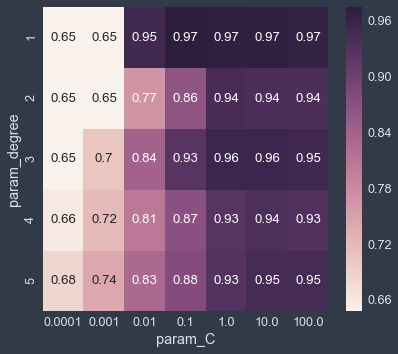

In [8]:
sns.heatmap(accuracies, annot=True) 
plt.show()

In [9]:
#best accuracy
svc = SVC(kernel = 'poly', C = 0.1, degree = 1)
svc.fit(d_test_x, d_test_y)
svc.score(d_test_x, d_test_y)

0.98048780487804876

From the grid search the best parameters are C = 0.1 and degree = 1.
Using these parameters the best accuracy we get is 98%.

Generally, our model is innaccurate if we have too low of a C because we fail to penalize misclassified points. If our C is too high the SVM tries to classify outliers and the model overfits. Also with a high degree our model tends to overfit because it allows too many degrees of freedom and begins to fit more noise.

In [10]:
#grid search polynomial kernal
def grid_search_rbf(X, y):
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    gamma = [0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {'C': Cs, 'gamma' : gamma}
    search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5)
    search.fit(X, y)
    print(search.best_score_, search.best_params_)
    return search.cv_results_

In [13]:
resultsCV = grid_search_rbf(d_train_x, d_train_y)
resultsCV = pd.DataFrame(resultsCV)
accuraciesCV = resultsCV.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

0.966457023061 {'C': 1, 'gamma': 0.1}


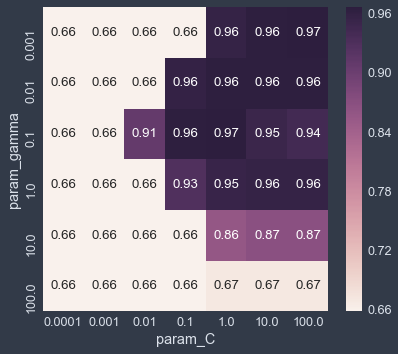

In [14]:
sns.heatmap(accuraciesCV, annot=True) 
plt.show()

The best accuracy with cross validated grid search is 97% using C = 1, and gamma = 0.01